# Data Science with Python
# Project 3: Movielens Case Study


**PROJECT DESCRIPTION**

**Background of Problem Statement :**
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.


**Problem Objective :**
Here, We'll be performing the analysis using the Exploratory Data Analysis technique. We need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.


**Analysis Tasks to be performed:**

1. Import the three datasets


2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. Hint:
(i) Merge two tables at a time.
(ii) Merge the tables using two primary keys MovieID & UserId


3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    * User Age Distribution
    * User rating of the movie “Toy Story”
    * Top 25 movies by viewership rating
    * Find the ratings for all the movies reviewed by for a particular user of user id = 2696


4. Feature Engineering: 
   Use column genres:
   * Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
   * Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
   * Determine the features affecting the ratings of any particular movie.
   * Develop an appropriate model to predict the movie ratings


In [1]:
import pandas as pd

#Input movies dataset
movies = pd.read_csv("C:/Users/Siddhartha Patra/Desktop/Simplilearn/Python/01 - Project/Data science with Python 1/Data science with Python 1/movies.dat", sep="::", names=['MovieID', 'Title', 'Genres'] )

#Read the sample movies dataset
movies.head()

C:\Users\Siddhartha Patra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
#Input ratings dataset
ratings = pd.read_csv("C:/Users/Siddhartha Patra/Desktop/Simplilearn/Python/01 - Project/Data science with Python 1/Data science with Python 1/ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'] )

#Read the sample ratings dataset
ratings.head()

C:\Users\Siddhartha Patra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
#Input users dataset
users = pd.read_csv("C:/Users/Siddhartha Patra/Desktop/Simplilearn/Python/01 - Project/Data science with Python 1/Data science with Python 1/users.dat", sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] )

#Read the sample users dataset
users.head()

C:\Users\Siddhartha Patra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
#Merge the ratings and users with 'UserID'
ratings_user = pd.merge(ratings,users, on=['UserID'])

#Merge the ratings and movie with 'movieID'
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

#Merge the ratings_user and ratings_movie with 'UserID', 'movieID' and 'Rating'
master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


In [5]:
#User age distribution
import matplotlib.pyplot as plt

users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

<Figure size 640x480 with 1 Axes>

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

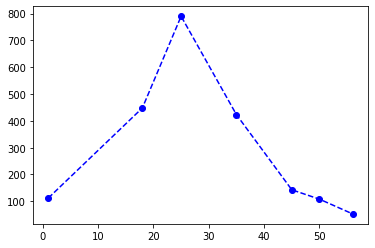

In [6]:
#User rating of the movie “Toy Story”

res = master_data[master_data.Title == "Toy Story (1995)"]

plt.plot(res.groupby("Age")["MovieID"].count(),'--bo')
res.groupby("Age")["MovieID"].count()

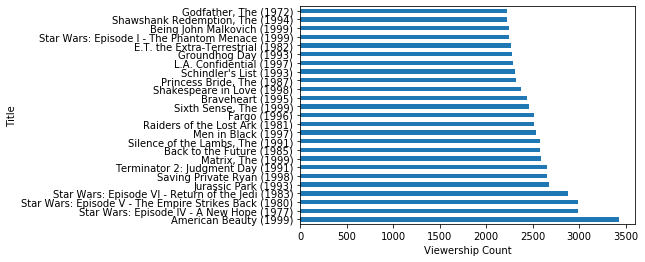

In [7]:
#Top 25 movies by viewership rating

res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,M,7,4
440668,1270,Back to the Future (1985),2696,25,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,M,7,4
440670,1625,"Game, The (1997)",2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
440673,1805,Wild Things (1998),2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
440675,800,Lone Star (1996),2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


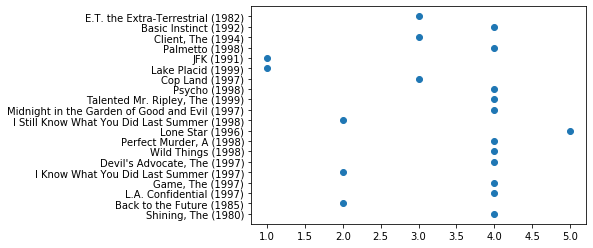

In [8]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

res = master_data[master_data.UserID == 2696]

plt.scatter(y=res.Title, x=res.Rating)

res

In [28]:
#Feature Engineering

val = movies.Genres.str.split("|")

res_col = []
for v in val:
    for i in v:
        if i not in res_col:
            res_col.append(i)

res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")

df = pd.DataFrame(columns=res_col)

res = master_data.merge(movies, on = ['MovieID'], how="left")[["Genres","Rating","Gender", "Age"]]

for index, row in res.head(10000).iterrows():
    tmp = row.Genres.split("|") 
    
    for i in tmp:
       # print(i)
        df.loc[index,i] = 1
        df.loc[index,"Gender"] = res.loc[index,"Gender"]
        df.loc[index,"Age"] = res.loc[index,"Age"]
        df.loc[index,"Rating"] = res.loc[index,"Rating"]
         
#         var = res.loc[index, "Rating"]
#         if var == 1:
#             df.loc[index,"Rating"] = "one" 
#         elif var == 2:
#             df.loc[index,"Rating"] = "two"
#         elif var == 3:
#             df.loc[index,"Rating"] = "three"
#         elif var == 4:
#             df.loc[index,"Rating"] = "four"
#         else:
#             df.loc[index,"Rating"] = "five"
     
    df.loc[index,df.columns[~df.columns.isin(tmp+["Gender","Rating","Age"])]] = 0

df.head()
    

#df.loc[i,"Animation"] = 1

#df

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,4
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,1,5


In [29]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

X = df[df.columns[~df.columns.isin(["Rating"])]]
y = df.Rating

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

number = LabelEncoder()
X_train.Gender = number.fit_transform(X_train["Gender"].astype("str"))
X_test.Gender = number.fit_transform(X_test["Gender"].astype("str"))
y_train = number.fit_transform(y_train.astype("int"))
y_test = number.fit_transform(y_test.astype("int"))

C:\Users\Siddhartha Patra\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
#SVM

from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
accuracy
#cm

0.336

In [31]:
#KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy

0.3024

In [32]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test)  
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

accuracy

0.1112

On comparison, we achieved maximum accuracy with Support vector machine (SVM) and therefore we will be deploying SVM to our dataset to predict movie ratings!